<font size="11">**Hierarchical Clustering Analysis of Country-Wise Air Quality Index (AQI) for the Year 2023**</font>

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [195]:
df = pd.read_csv(r"C:\Users\jinil\Desktop\Hierarchical clustering\Countrywise_AQI_dataset.csv")
df.head(10)

,Year,Country,AQI Value
0,2023,Albania,25.68
1,2023,Algeria,51.43
2,2023,Andorra,26.00
3,2023,Angola,109.64
4,2023,Argentina,30.59
5,2023,Armenia,34.55
6,2023,Australia,46.50
7,2023,Austria,37.95
8,2023,Azerbaijan,38.68
9,2023,Bahrain,110.67


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       141 non-null    int64  
 1   Country    141 non-null    object 
 2   AQI Value  141 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+ KB


In [197]:
df.duplicated().sum()

0

In [198]:
df.isnull().sum()

Year         0
Country      0
AQI Value    0
dtype: int64

In [199]:
x = df['AQI Value']

In [202]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df[['AQI Value']])

In [203]:
x

array([[-0.97863059],
       [-0.36548453],
       [-0.97101091],
       [ 1.02058274],
       [-0.86171614],
       [-0.76742261],
       [-0.48287522],
       [-0.68646352],
       [-0.66908113],
       [ 1.04510858],
       [ 1.48371636],
       [-0.64741266],
       [ 0.08098105],
       [-0.84766736],
       [-1.21126892],
       [-0.7498021 ],
       [-0.07593672],
       [ 0.39053051],
       [-1.27722677],
       [-0.8769555 ],
       [ 3.05313216],
       [-0.70146476],
       [ 0.797469  ],
       [-0.70479837],
       [-1.1186422 ],
       [ 0.94700521],
       [ 3.21981264],
       [ 2.05423984],
       [ 3.86700914],
       [ 0.15789218],
       [-0.99910848],
       [-0.71979961],
       [-0.30428898],
       [ 0.02478591],
       [-1.04577902],
       [-0.90505307],
       [-0.35191198],
       [ 0.01788058],
       [ 0.38624444],
       [-0.9612482 ],
       [ 1.82564947],
       [-0.59431302],
       [-0.04450555],
       [-1.06839994],
       [ 0.73341608],
       [-0

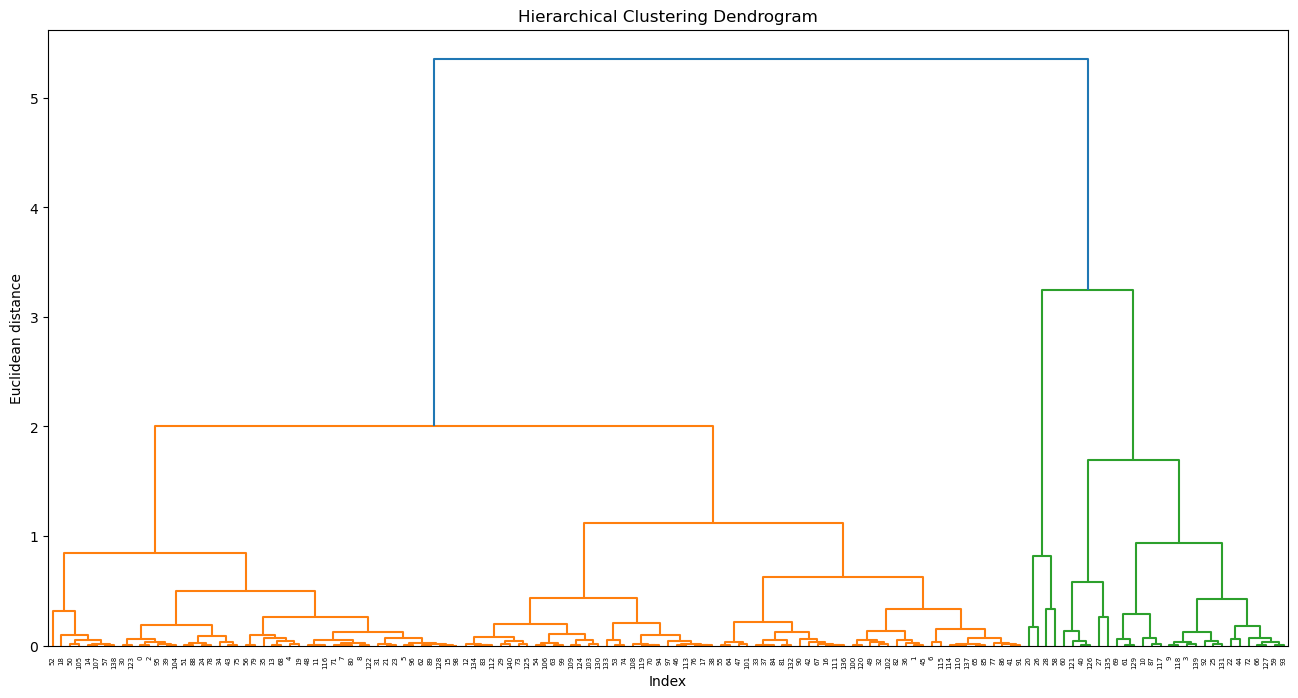

In [204]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(1, figsize=(16, 8))
Dendo = dendrogram(linkage(x, method="complete"))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distance')
plt.show()

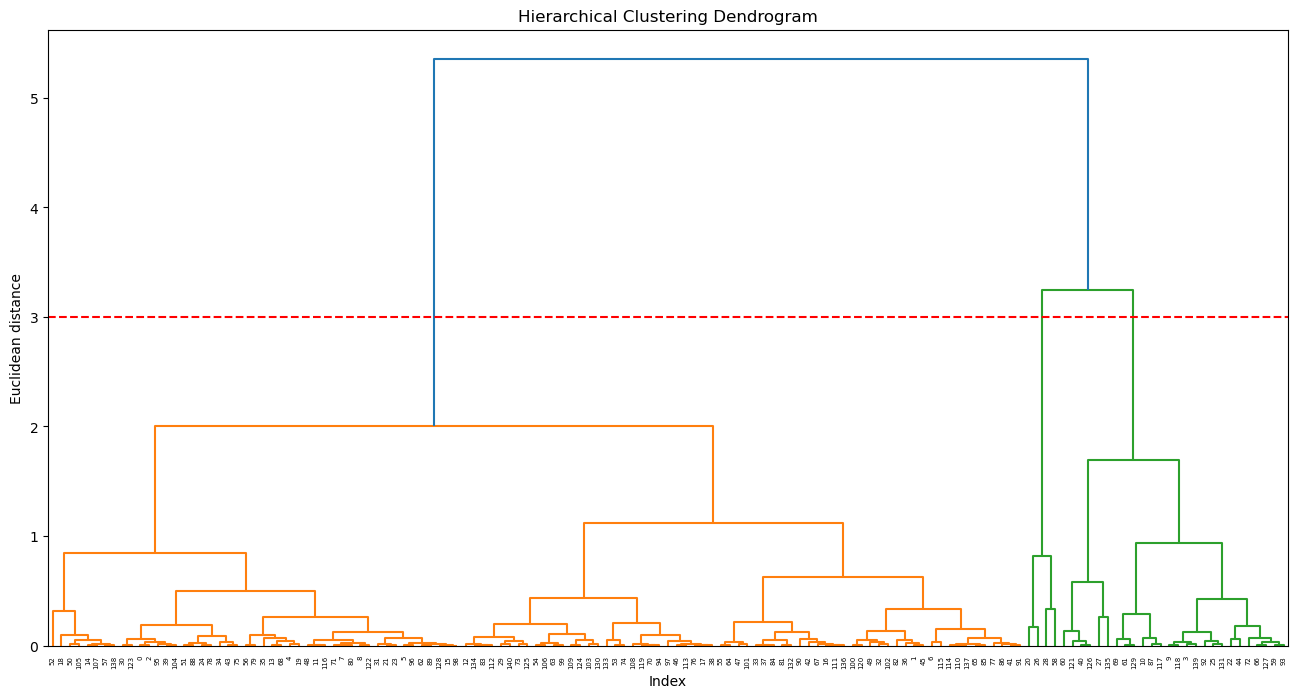

In [234]:
plt.figure(1, figsize=(16, 8))
Dendo = dendrogram(linkage(x, method="complete"))
plt.axhline(y=3, color='r', linestyle='--', label='Threshold at index 3')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distance')
plt.show()

In [235]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(x)

In [236]:
labels

array([2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2,
       0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0,
       2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 2, 0, 1, 0,
       1, 1, 1, 0, 1, 2, 2, 0, 1], dtype=int64)

In [242]:
df['Cluster'] = labels
df

,Year,Country,AQI Value,Cluster
0,2023,Albania,25.68,2
1,2023,Algeria,51.43,1
2,2023,Andorra,26.00,2
3,2023,Angola,109.64,0
4,2023,Argentina,30.59,2
...,...,...,...,...
136,2023,Uzbekistan,63.73,1
137,2023,Vatican,44.27,2
138,2023,Venezuela,15.55,2
139,2023,Vietnam,109.14,0


In [254]:
pd.set_option('display.max_rows', None)      # Show all rows
grouped_clusters = df.groupby('Cluster')['Country'].apply(list)
print("\nCountries in each cluster:")
grouped_clusters




Countries in each cluster:


Cluster
0                                                                                                                                                                                                                                                                                                                                  [Angola, Bahrain, Bangladesh, Burkina Faso, Canada, Central African Republic, Chad, Chile, China, Ethiopia, Gabon, India, Indonesia, Iran, Iraq, Japan, Kazakhstan, Kuwait, Mexico, Myanmar, Nepal, South Africa, South Korea, Sudan, Thailand, Togo, Turkey, Uganda, United States of America, Vietnam]
1                               [Algeria, Belgium, Bosnia and Herzegovina, Brazil, Colombia, Cyprus, Czech Republic, Ecuador, Egypt, El Salvador, France, Georgia, Germany, Ghana, Greece, Guatemala, Honduras, Hong Kong, Israel, Italy, Jersey, Kenya, Kyrgyzstan, Laos, Lebanon, Macao, Macedonia, Madagascar, Malaysia, Mongolia, Netherlands, Nigeria, Pakistan, Palestinian Te

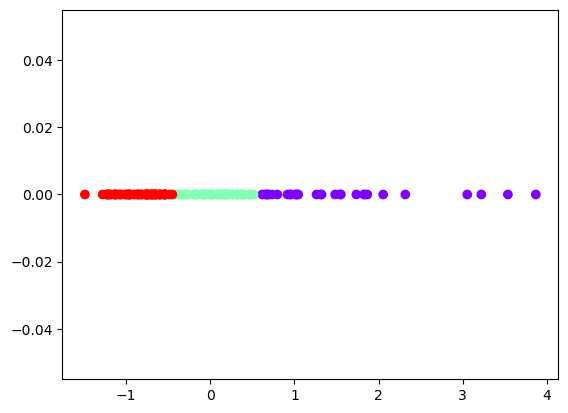

In [237]:

plt.scatter(x[:,0], np.zeros_like(x), c=cluster.labels_, cmap="rainbow")
# 1D scatter plot because of single feature

In [238]:
# **Silhouette coefficient:**  
from sklearn import metrics
metrics.silhouette_score(x, cluster.labels_)



0.5668119412182735

In [239]:

metrics.davies_bouldin_score(x, cluster.labels_)

0.5637405553370983

In [240]:

metrics.calinski_harabasz_score(x, cluster.labels_)


257.72506675812286